In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns

In [3]:
path='/content/drive/MyDrive/datasets/amazonreviews.tsv'

In [4]:
df = pd.read_csv(path, sep='\t')

In [5]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [6]:
# size of dataset
df.shape

(10000, 2)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [10]:
df['label'].unique()

array(['pos', 'neg'], dtype=object)

In [11]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

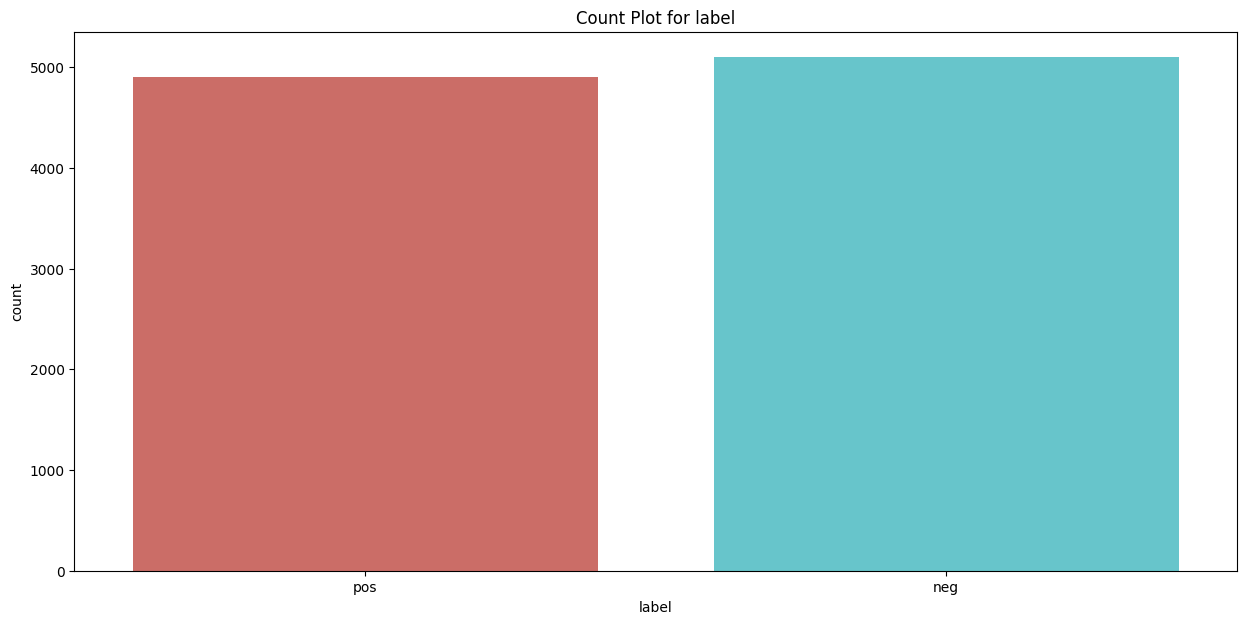

In [12]:
plt.figure(figsize=[15,7],)
plt.title('Count Plot for label')
# color = ['red', 'blue']
sns.countplot(x = 'label', data = df, palette = 'hls')
plt.show()

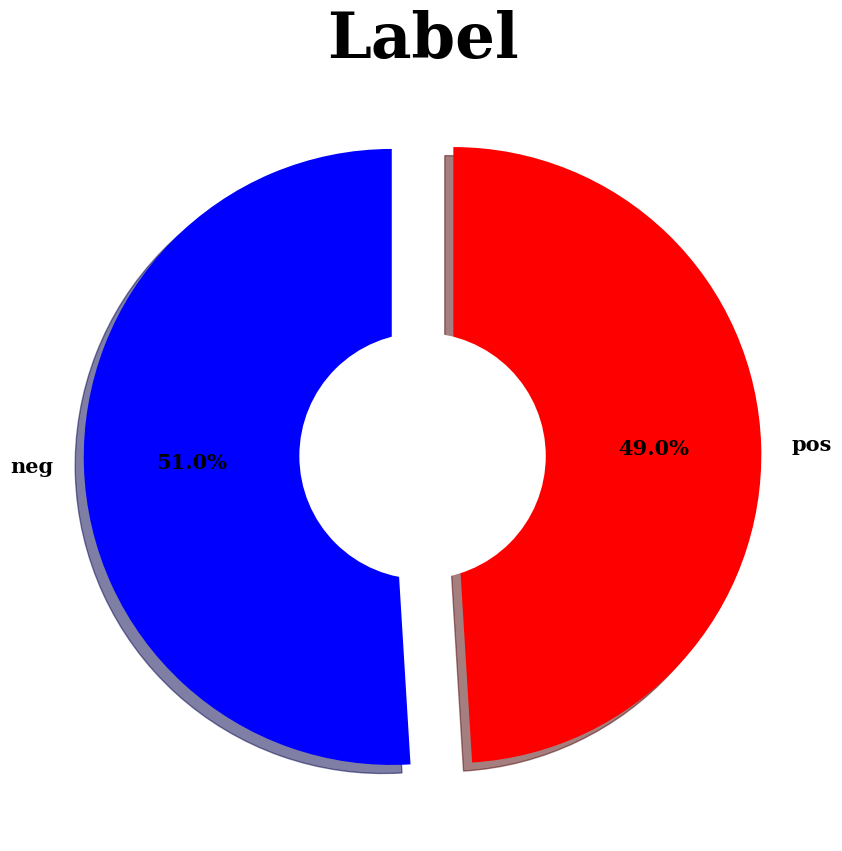

In [13]:
label_data = df['label'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 15,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=45, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [14]:
#removing empty strings 
blanks = [] 

for i,lb,rv in df.itertuples():  
    if type(rv)==str:            
        if rv.isspace():         
            blanks.append(i)     
        
df.drop(blanks, inplace=True)

In [15]:
#importing all the required libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

In [16]:
#converting the reviews into lower case
df.review=df.review.apply(lambda x: x.lower())

In [17]:
df

,label,review
0,pos,stuning even for the non-gamer: this sound tra...
1,pos,the best soundtrack ever to anything.: i'm rea...
2,pos,amazing!: this soundtrack is my favorite music...
3,pos,excellent soundtrack: i truly like this soundt...
4,pos,"remember, pull your jaw off the floor after he..."
...,...,...
9995,pos,a revelation of life in small town america in ...
9996,pos,great biography of a very interesting journali...
9997,neg,interesting subject; poor presentation: you'd ...
9998,neg,don't buy: the box looked used and it is obvio...


In [18]:
import re

def remove_sp(text):
    pattern=r'[^A-Za-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

df.review=df.review.apply(remove_sp)
df

,label,review
0,pos,stuning even for the nongamer this sound track...
1,pos,the best soundtrack ever to anything im readin...
2,pos,amazing this soundtrack is my favorite music o...
3,pos,excellent soundtrack i truly like this soundtr...
4,pos,remember pull your jaw off the floor after hea...
...,...,...
9995,pos,a revelation of life in small town america in ...
9996,pos,great biography of a very interesting journali...
9997,neg,interesting subject poor presentation youd be ...
9998,neg,dont buy the box looked used and it is obvious...


In [19]:
import string
punctuations=list(string.punctuation)

In [20]:
df.review=df.review.apply(lambda x : " ".join(x for x in x.split() if x not in punctuations))

In [21]:
# Removing stopwords
nltk.download('stopwords')
stopword_list=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
stopword_list.remove('no')
stopword_list.remove('not')

In [23]:
df.review=df.review.apply(lambda x : " ".join(x for x in x.split() if x not in stopword_list))
df['review'][5]

'absolute masterpiece quite sure actually taking time read played game least heard least tracks whether aware not mitsudas music contributed greatly mood every single minute whole gamecomposed 3 cds quite songs havent exact count heartrendering impressively remarkable soundtrack one assure not forget everything every listener fastpaced energetic dancing tokage termina home slower haunting dragon god purely beautifully composed times scar even fantastic vocals radical dreamersthis one best videogame soundtracks surely mitsudas best ever'

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['review']=df.review.apply(word_tokenize)
df['review'][0]

['stuning',
 'even',
 'nongamer',
 'sound',
 'track',
 'beautiful',
 'paints',
 'senery',
 'mind',
 'well',
 'would',
 'recomend',
 'even',
 'people',
 'hate',
 'vid',
 'game',
 'music',
 'played',
 'game',
 'chrono',
 'cross',
 'games',
 'ever',
 'played',
 'best',
 'music',
 'backs',
 'away',
 'crude',
 'keyboarding',
 'takes',
 'fresher',
 'step',
 'grate',
 'guitars',
 'soulful',
 'orchestras',
 'would',
 'impress',
 'anyone',
 'cares',
 'listen']

In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
lemmatizer=WordNetLemmatizer()

In [28]:
df['review']=df.review.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

In [29]:
df

,label,review
0,pos,"[stuning, even, nongamer, sound, track, beauti..."
1,pos,"[best, soundtrack, ever, anything, im, reading..."
2,pos,"[amazing, soundtrack, favorite, music, time, h..."
3,pos,"[excellent, soundtrack, truly, like, soundtrac..."
4,pos,"[remember, pull, jaw, floor, hearing, youve, p..."
...,...,...
9995,pos,"[revelation, life, small, town, america, early..."
9996,pos,"[great, biography, interesting, journalist, bi..."
9997,neg,"[interesting, subject, poor, presentation, you..."
9998,neg,"[dont, buy, box, looked, used, obviously, not,..."


In [30]:
df.review= df.review.astype(str)

In [31]:
review_list=df['review'].array
review_list.shape

(10000,)

In [32]:
x = df.iloc[:,1].values
y = df.iloc[:,0].values

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [34]:
print(x_train.shape)
x_test.shape

(7500,)


(2500,)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [36]:
final = Pipeline([('Vect',TfidfVectorizer()),
                  ('model',SVC(probability=True))])

In [37]:
final.fit(x_train,y_train)

Pipeline(steps=[('Vect', TfidfVectorizer()), ('model', SVC(probability=True))])

In [38]:
y_pred=final.predict(x_test)
y_pred

array(['neg', 'pos', 'neg', ..., 'neg', 'neg', 'pos'], dtype=object)

In [40]:
report = classification_report(y_test,y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose().round(2)

#df_report.style.background_gradient(cmap='greens').set_precision(2)
cm = sns.light_palette("green", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
neg,0.870000,0.890000,0.880000,1249.000000
pos,0.890000,0.870000,0.880000,1251.000000
accuracy,0.880000,0.880000,0.880000,0.880000
macro avg,0.880000,0.880000,0.880000,2500.000000
weighted avg,0.880000,0.880000,0.880000,2500.000000


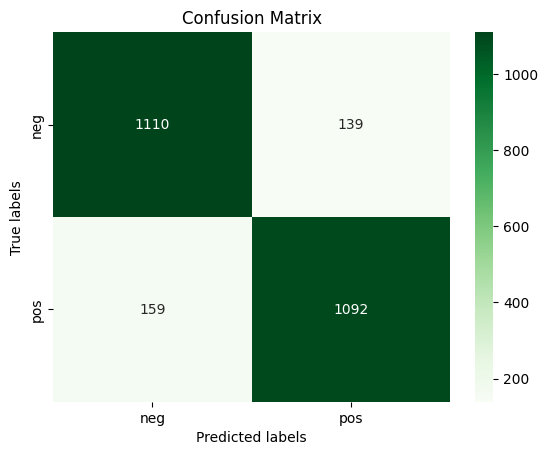

In [41]:
ax= plt.subplot()
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neg', 'pos']); ax.yaxis.set_ticklabels(['neg', 'pos']);

In [42]:
accuracy_score(y_pred,y_test)

0.8808

In [43]:
confusion_matrix(y_pred,y_test)

array([[1110,  159],
       [ 139, 1092]])

In [44]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         neg       0.89      0.87      0.88      1269
         pos       0.87      0.89      0.88      1231

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



In [45]:
x_test[1]

"['one', 'greatest', 'book', 'ever', 'written', 'scarlet', 'letter', 'excellent', 'book', 'hawthorne', 'spends', 'much', 'time', 'discussing', 'character', 'thought', 'motif', 'end', 'book', 'understand', 'people', 'act', 'way', 'make', 'seem', 'almost', 'real', 'relates', 'nature', 'character', 'experiencing', 'make', 'story', 'even', 'powerful', 'one', 'place', 'told', 'rose', 'bush', 'grew', 'prison', 'seemed', 'nature', 'saying', 'even', 'though', 'people', 'abandoned', 'someone', 'could', 'always', 'count', 'nature', 'love', 'beautifully', 'written', 'story', 'adultery', 'jealous', 'spouse', 'happens', 'day', 'make', 'scarlet', 'letter', 'relate', 'reader', 'great', 'book', 'feel', 'one', 'best', 'ever', 'written']"

In [46]:
final.predict([x_test[1]])

array(['pos'], dtype=object)

In [47]:
x_test[7]

"['boring', 'dont', 'waste', 'time', 'movie', 'boring', 'looking', 'forward', 'bash', 'america', 'flying', 'scene', 'look', 'fakelong', 'boring', 'love', 'story', 'end', 'character', 'not', 'finding', 'otherrent', 'buy', 'blue', 'max', 'much', 'better']"

In [48]:
final.predict([x_test[7]])

array(['neg'], dtype=object)

In [49]:
x_test[17]

"['another', 'nightmare', 'remove', 'cassette', 'message', 'camera', '18', 'month', '2', 'month', 'ago', 'started', 'beeping', 'eject', 'tape', 'almost', 'every', 'time', 'used', 'went', 'online', 'found', 'common', 'camera', 'reason', 'able', 'prevent', 'major', 'problem', 'removing', 'tape', 'use', 'no', 'longer', 'work', 'can', 'not', 'record', 'watch', 'tape', 'without', 'forcing', 'remove', 'cassette', 'fond', 'camera', 'stopped', 'working', 'disappointed', 'buy', 'new', 'camcorder', 'local', 'repairman', 'estimated', '200', 'fix', 'friend', 'exact', 'camera', 'yet', 'problem', 'isnt', 'worth', 'risk']"

In [50]:
final.predict([x_test[17]])


array(['neg'], dtype=object)